In [1]:
import tweepy 
import sys
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import csv

def percentage(part,whole):
    return 100*float(part)/float(whole)


#Credentials for Twitter App. Get Your from apps.twitter.com

consumerKey = '**********************************'
consumerSecret = '******************************************'
accessToken = '********************************************'
accessTokenSecret = '*****************************************'



#Establishing the connection

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth,wait_on_rate_limit=True)

searchTerm=input("Enter the keyword/Hashtag to search about :")
noofsearchTerms=int(input("Enter the no. of tweets to analyze :"))

tweets = tweepy.Cursor(api.search, q=searchTerm,lang="en").items(noofsearchTerms)


Time=[]
Text=[]
Name=[]
Location=[]
Followers_count=[]

for tweet in tweepy.Cursor(api.search,q=searchTerm,lang="en",since="2017-04-03",result_type='popular').items(noofsearchTerms/2):
    Time.append(tweet.created_at)
    Text.append(tweet.text)
    Name.append(tweet.user.name)
    Location.append(tweet.user.location)
    Followers_count.append(tweet.user.followers_count)
    
for tweet in tweepy.Cursor(api.search,q=searchTerm,lang="en").items(noofsearchTerms/2):
    Time.append(tweet.created_at)
    Text.append(tweet.text)
    Name.append(tweet.user.name)
    Location.append(tweet.user.location)
    Followers_count.append(tweet.user.followers_count)
    
d={
    'Time':Time,
    'Text':Text,
    'Name':Name,
    'Location':Location,
    'Followers_count':Followers_count
}

df=pd.DataFrame(d)

Enter the keyword/Hashtag to search about :Modi
Enter the no. of tweets to analyze :1000


In [2]:
#Sorting Values By Followers Count to Find out the top Influencers who are INfluencing the topic

df.sort_values(by='Followers_count',inplace=True,ascending=False)
df['Sentiment']=0
noofTerms=df.shape[0]
df.head()

,Followers_count,Location,Name,Text,Time,Sentiment
61,43229079,India,Narendra Modi,Leaving for West Bengal. Will be addressing a ...,2018-07-16 04:17:53,0
2,43229079,India,Narendra Modi,Looking forward to addressing the Indian commu...,2018-07-24 16:34:17,0
42,39997778,,CNN,Rwanda hosts China's President Xi Jinping and ...,2018-07-23 21:51:04,0
73,26610511,India,PMO India,Those shedding crocodile tears should be asked...,2018-07-16 04:06:18,0
67,13039703,New Delhi,Arun Jaitley,The political agenda for the debate this year ...,2018-07-16 08:12:23,0


In [3]:
positive=0
negative=0
neutral=0
polarity=0

for i,tweet in enumerate(df['Text']):
    analysis=TextBlob(tweet)
    polarity+=analysis.sentiment.polarity
    if(analysis.sentiment.polarity==0.0):
        neutral+=1
    elif(analysis.sentiment.polarity>0.00):
        positive+=1
    elif(analysis.sentiment.polarity<0.00):
        negative+=1

    if(analysis.sentiment.polarity==0.0):
        df['Sentiment'][i]=1
    elif(analysis.sentiment.polarity>0.0):
        df['Sentiment'][i]=2
    elif(analysis.sentiment.polarity<0.0):
        df['Sentiment'][i]=0
        
        
#Calculating the percentage of all the positive,negative and neutral terms

positive=percentage(positive,noofTerms)
negative=percentage(negative,noofTerms)
neutral=percentage(neutral,noofTerms)


positive=format(positive, '.2f')
negative=format(negative, '.2f')
neutral=format(neutral, '.2f')



print("How people are reacting on "+ searchTerm +" by analyzing  "+" tweets.")


if (polarity==0):
    print("Overall Polarity is Neutral")
elif (polarity>0):
    print("Overall Polarity is Positive")
elif (polarity<0):
    print("Overall Polarity is Negative")
    


/home/himanshun3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/himanshun3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/himanshun3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


How people are reacting on Modi by analyzing   tweets.
Overall Polarity is Positive


In [4]:
df.head()

,Followers_count,Location,Name,Text,Time,Sentiment
61,43229079,India,Narendra Modi,Leaving for West Bengal. Will be addressing a ...,2018-07-16 04:17:53,2
2,43229079,India,Narendra Modi,Looking forward to addressing the Indian commu...,2018-07-24 16:34:17,1
42,39997778,,CNN,Rwanda hosts China's President Xi Jinping and ...,2018-07-23 21:51:04,1
73,26610511,India,PMO India,Those shedding crocodile tears should be asked...,2018-07-16 04:06:18,0
67,13039703,New Delhi,Arun Jaitley,The political agenda for the debate this year ...,2018-07-16 08:12:23,1


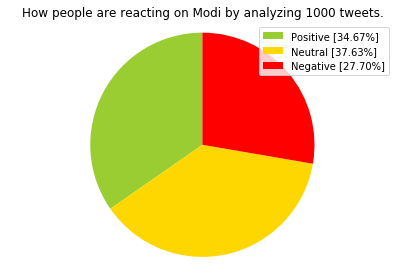

In [5]:
#Visualization


labels=['Positive [' +str(positive)+'%]', 'Neutral [' +str(neutral)+'%]', 'Negative [' +str(negative)+'%]']
sizes=[positive,neutral,negative]
colors=['yellowgreen','gold','red']
patches,texts=plt.pie(sizes, colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("How people are reacting on "+ searchTerm +" by analyzing "+ str(noofsearchTerms)+" tweets.")
plt.axis("equal")
plt.tight_layout()
plt.show();

In [6]:
                    #Heat Map
import googlemaps
import gmplot

gmaps = googlemaps.Client(key='****************************************')
coordinates={'latitude':[],'longitude':[]}

for count,user_loc in enumerate(df['Location']):
    try:
        location=gmaps.geocode(user_loc)
        for i in location:
            coordinates['latitude'].append(i['geometry']['location']['lat'])
            coordinates['longitude'].append(i['geometry']['location']['lng'])
            
    except:
        pass

    
gmap = gmplot.GoogleMapPlotter(30, 0, 3)

gmap.heatmap(coordinates['latitude'],coordinates['longitude'],radius=20)
gmap.draw("python_heatmap.html")

In [9]:
df['SNo']=range(0,noofTerms)
df.reset_index(drop=True)
df.head()

,Followers_count,Location,Name,Text,Time,Sentiment,SNo
61,43229079,India,Narendra Modi,Leaving for West Bengal. Will be addressing a ...,2018-07-16 04:17:53,2,0
2,43229079,India,Narendra Modi,Looking forward to addressing the Indian commu...,2018-07-24 16:34:17,1,1
42,39997778,,CNN,Rwanda hosts China's President Xi Jinping and ...,2018-07-23 21:51:04,1,2
73,26610511,India,PMO India,Those shedding crocodile tears should be asked...,2018-07-16 04:06:18,0,3
67,13039703,New Delhi,Arun Jaitley,The political agenda for the debate this year ...,2018-07-16 08:12:23,1,4


In [10]:
df.index=df['SNo']

In [11]:
import googlemaps
import gmplot
df['Latitude']=0.000000
df['Longitude']=0.000000
gmaps = googlemaps.Client(key='*********************************')
lat=[]
lng=[]
for i,value in enumerate(df['Location']):
    try:
        location=gmaps.geocode(value)
        for j in location:
            df['Latitude'][i]=j['geometry']['location']['lat']
            df['Longitude'][i]=j['geometry']['location']['lng']
            
    except:
        pass



/home/himanshun3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/himanshun3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [12]:
df.head()

,Followers_count,Location,Name,Text,Time,Sentiment,SNo,Latitude,Longitude
SNo,,,,,,,,,
0,43229079,India,Narendra Modi,Leaving for West Bengal. Will be addressing a ...,2018-07-16 04:17:53,2,0,20.593684,78.962880
1,43229079,India,Narendra Modi,Looking forward to addressing the Indian commu...,2018-07-24 16:34:17,1,1,20.593684,78.962880
2,39997778,,CNN,Rwanda hosts China's President Xi Jinping and ...,2018-07-23 21:51:04,1,2,0.000000,0.000000
3,26610511,India,PMO India,Those shedding crocodile tears should be asked...,2018-07-16 04:06:18,0,3,20.593684,78.962880
4,13039703,New Delhi,Arun Jaitley,The political agenda for the debate this year ...,2018-07-16 08:12:23,1,4,28.613939,77.209021


In [17]:
import gmaps
import matplotlib.pyplot as plt 

gmaps.configure(api_key='****************************************')

negative_tweets= df[df['Sentiment'] == 0]
negative_tweets_location = negative_tweets[['Latitude', 'Longitude']]

neutral_tweets= df[df['Sentiment'] == 1]
neutral_tweets_location = neutral_tweets[['Latitude', 'Longitude']]

positive_tweets= df[df['Sentiment'] == 2]
positive_tweets_location = positive_tweets[['Latitude', 'Longitude']]


negative_layer = gmaps.symbol_layer(
    list(negative_tweets_location.values), fill_color='rgba(255, 0, 0, 0.8)',
    stroke_color='rgba(255, 0, 0, 0.8)', scale=5
)

neutral_layer = gmaps.symbol_layer(
    list(neutral_tweets_location.values), fill_color='rgba(250, 250, 210, 0.8)',
    stroke_color='rgba(255, 255, 102, 0.8)', scale=5
)
positive_layer = gmaps.symbol_layer(
    list(positive_tweets_location.values), fill_color='rgba(0, 100, 0, 0.8)',
    stroke_color='rgba(0, 100, 0, 0.8)', scale=5
)


In [18]:
#Green Color For POsitive tweets
#Red Color For Negative Tweets
#YelloW Color For Neutral Tweets

fig = gmaps.figure()
fig.add_layer(negative_layer)
fig.add_layer(neutral_layer)
fig.add_layer(positive_layer)
fig

Figure(layout=FigureLayout(height='420px'))